In [269]:
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree
from sklearn.ensemble import VotingClassifier
# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
# Package for generating classification report
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
# Module to save and load Python objects to and from files
import pickle 
# Importing libraries
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib
import seaborn as sns                # Seaborn

# Package to implement Decision Tree Model
import sklearn
from sklearn.tree import DecisionTreeClassifier

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package to visualize Decision Tree
from sklearn import tree
from sklearn.ensemble import VotingClassifier
# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
# Package for generating classification report
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
# Module to save and load Python objects to and from files
import pickle 

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

In [270]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [271]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [272]:
df['fetal_health'] = df['fetal_health'].astype(str) 

In [273]:
df['fetal_health']=df['fetal_health'].replace(str(1.0),'Normal')
df['fetal_health']=df['fetal_health'].replace(str(2.0),'Suspect')
df['fetal_health']=df['fetal_health'].replace(str(3.0),'Pathological')

In [274]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,Suspect
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,Normal
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,Normal
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,Normal
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,Normal


In [275]:
# Output column for prediction
output = df['fetal_health'] 

# Input features (excluding year column)
features = features = df[['baseline value', 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'abnormal_short_term_variability', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_max', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean', 'histogram_median', 'histogram_variance', 'histogram_tendency']]


# One-hot encoding to handle categorical variables
cat_var = []
features_encoded = pd.get_dummies(features, columns = cat_var)

features_encoded.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0


In [276]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
clf = DecisionTreeClassifier(random_state = 1)

# Fitting model on training data
clf.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

In [277]:
print (clf.classes_)

['Normal' 'Pathological' 'Suspect']


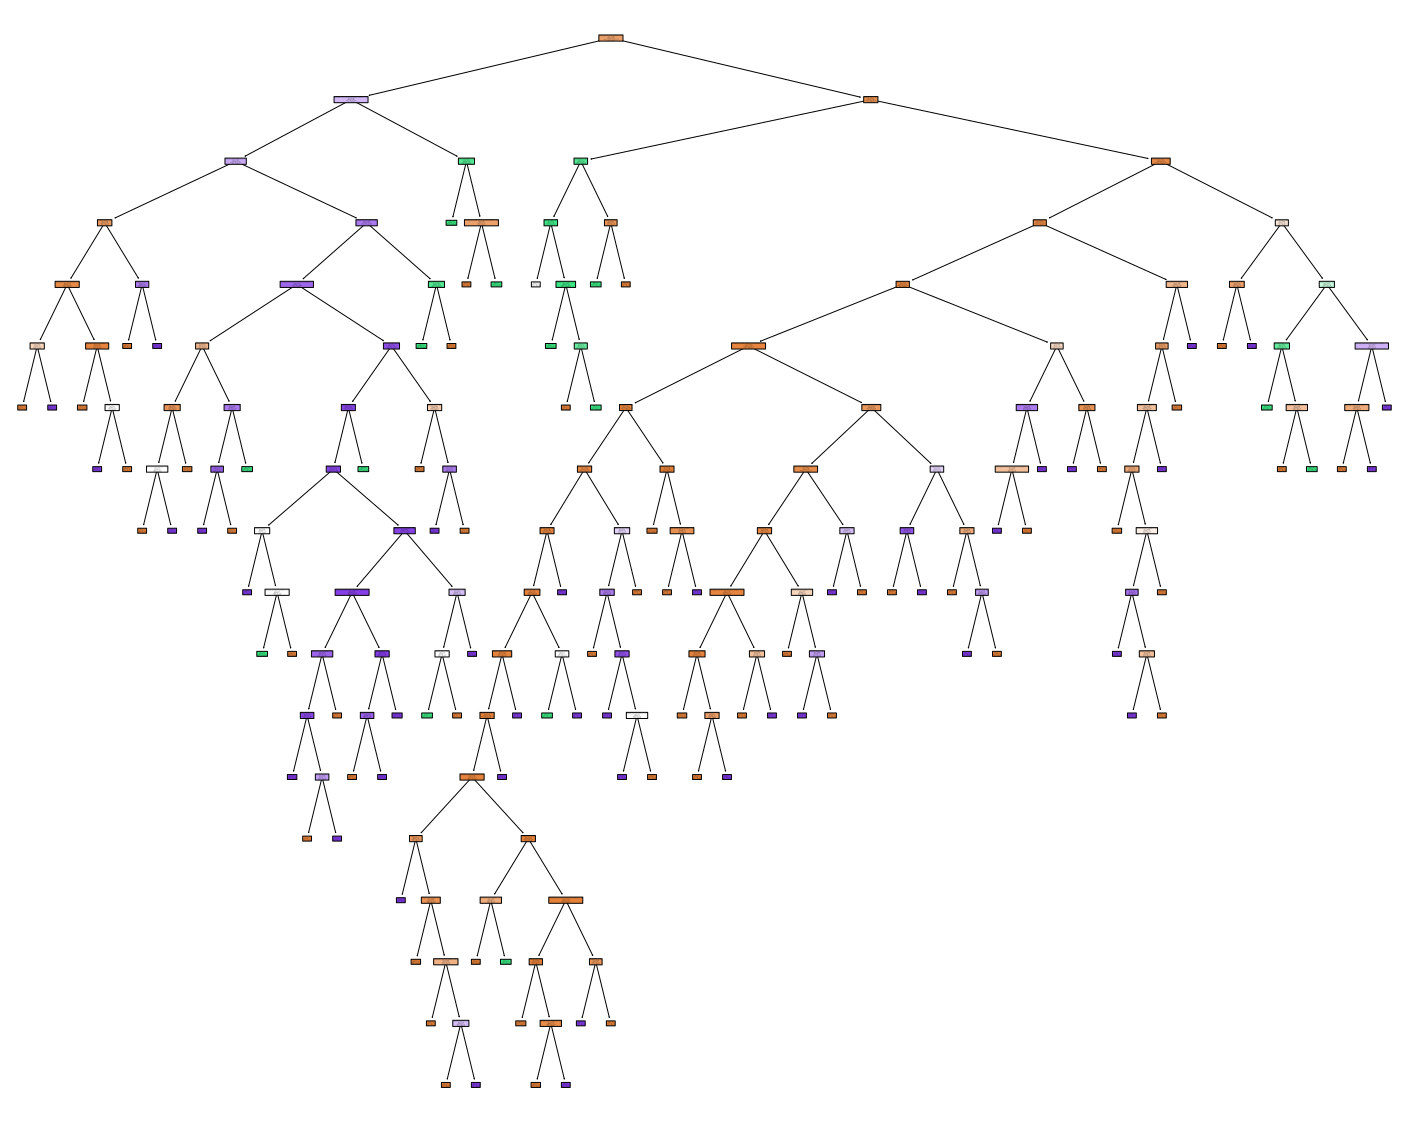

In [278]:
# Visualizing trained decision tree model

fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(decision_tree = clf,
                   max_depth = None,
                   feature_names = train_X.columns,
                   class_names = clf.classes_,
                   filled = True)

# Saving Decision Tree
fig.savefig("dt_visual.svg", bbox_inches = 'tight')

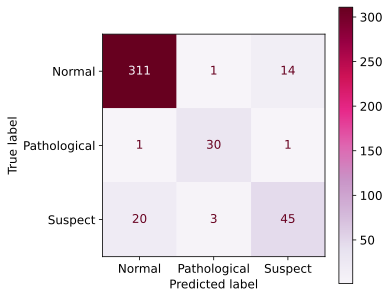

In [279]:
# Predictions on test set
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
dispplot=disp.plot(cmap = 'PuRd', ax = ax);
fig.savefig("dtconfusion_mat.svg", bbox_inches ='tight')

In [280]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df
report_df.to_csv('dt_class_report.csv') 

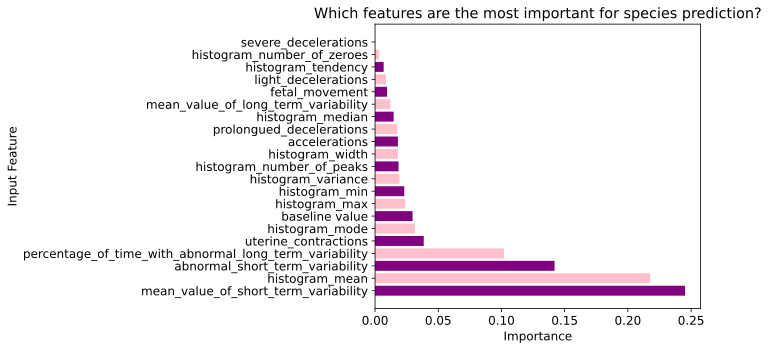

In [281]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("dt_feature_imp.svg");

In [282]:
predictions_proba = clf.predict_proba(test_X)
print(predictions_proba)

[[1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 ...
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [283]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_health.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, dt_pickle) 

# Close the file
dt_pickle.close() 

In [284]:
# Data partitioning into training and testing
train_X, test_X, train_y, test_y = train_test_split(features_encoded, output, test_size = 0.2, random_state = 1) 

# Defining prediction model
rclf = RandomForestClassifier(random_state = 42)

# Fitting model on training data
rclf.fit(train_X, train_y)

RandomForestClassifier(random_state=42)

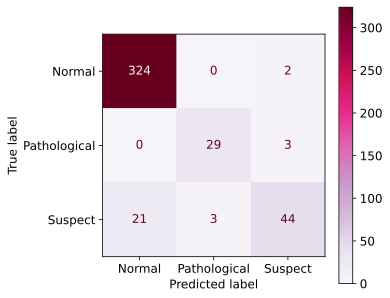

In [285]:
# Predictions on test set
y_pred = rclf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = rclf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rclf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
dispplot=disp.plot(cmap = 'PuRd', ax = ax);
fig.savefig("rfconfusion_mat.svg", bbox_inches ='tight')

In [286]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
rf_pickle = open('randomforest_health.pickle', 'wb') 

# Write DT model to the file
pickle.dump(rclf, rf_pickle) 

# Close the file
rf_pickle.close() 

In [287]:
with open('randomforest_health.pickle', 'rb') as rf_pickle:
  
    # Load the model
    loaded_model = pickle.load(rf_pickle)

In [288]:
# Predictions on test set
y_pred = loaded_model.predict(test_X)

predictions = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})
display(predictions.sample(5))

,Actual,Predicted
60,Normal,Normal
906,Normal,Normal
586,Normal,Normal
1441,Normal,Normal
736,Normal,Normal


In [289]:
# Generating Classification Report
print("Classification Report - \n", 
      classification_report(test_y, y_pred))
reportrf = classification_report(test_y, y_pred, output_dict = True)
report_rf = pd.DataFrame(reportrf)
report_rf
report_rf.to_csv('rf_class_report.csv') 

Classification Report - 
               precision    recall  f1-score   support

      Normal       0.94      0.99      0.97       326
Pathological       0.91      0.91      0.91        32
     Suspect       0.90      0.65      0.75        68

    accuracy                           0.93       426
   macro avg       0.91      0.85      0.87       426
weighted avg       0.93      0.93      0.93       426



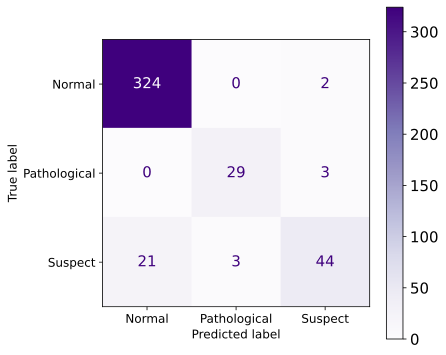

In [290]:
# Generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = loaded_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = loaded_model.classes_)

# Specify figure size and font size
fig, ax = plt.subplots(figsize = (6, 6))
plt.rcParams.update({'font.size': 15})

# Display Confusion Matrix
disp.plot(cmap = 'Purples', ax = ax);
fig.savefig("rfconfusion_mat.svg", bbox_inches ='tight')

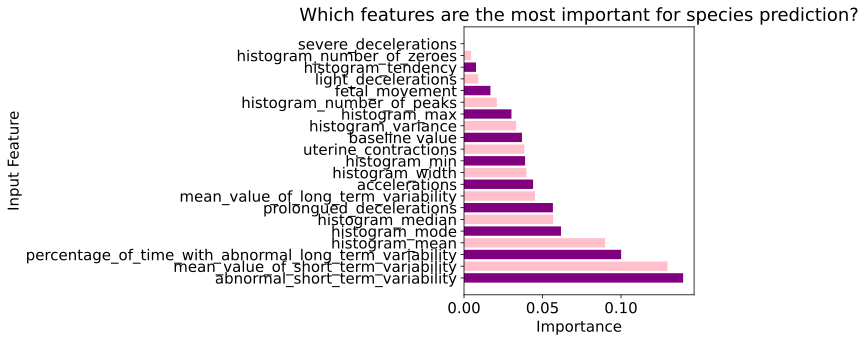

In [291]:
importance = rclf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("rf_feature_imp.svg");

In [292]:
predictionsprob = loaded_model.predict_proba(test_X)
print(predictionsprob)

[[0.85 0.01 0.14]
 [0.32 0.   0.68]
 [1.   0.   0.  ]
 ...
 [0.84 0.02 0.14]
 [0.51 0.   0.49]
 [0.01 0.03 0.96]]


In [293]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement AdaBoost
import sklearn
from sklearn.ensemble import AdaBoostClassifier

# Package to implement Grid Search Cross Validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# Package for generating confusion matrix
# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [294]:
# Define your model
classifier = AdaBoostClassifier(algorithm = 'SAMME', random_state = 42)

In [295]:
classifier.fit(train_X, train_y)

AdaBoostClassifier(algorithm='SAMME', random_state=42)

In [296]:

n_estimators = [int(x) for x in np.linspace(start = 5, stop = 500, num = 10)]

learning_rate = [x for x in np.arange(0.1, 2.1, 0.1)]


random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate
}

print(random_grid)

{'n_estimators': [5, 60, 115, 170, 225, 280, 335, 390, 445, 500], 'learning_rate': [0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0]}


In [297]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

In [298]:
random_cv = RandomizedSearchCV(estimator = classifier, 
                              param_distributions = random_grid,
                              n_iter = 100,
                              scoring = 'f1_macro', 
                              cv = folds, 
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1)

In [299]:
start = time.time()            # Start Time
random_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   1.5s
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   1.5s
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   1.5s
[CV] END ................learning_rate=0.2, n_estimators=280; total time=   1.5s
[CV] END ................learning_rate=0.2, n_estimators=280; total time=   1.5s
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   1.5s
[CV] END ................learning_rate=0.2, n_estimators=280; total time=   1.5s
[CV] END ................learning_rate=1.0, n_estimators=280; total time=   1.6s
[CV] END ..................learning_rate=0.4, n_estimators=5; total time=   0.0s
[CV] END ..................learning_rate=0.4, n_estimators=5; total time=   0.0s
[CV] END ..................learning_rate=0.4, n_estimators=5; total time=   0.0s
[CV] END ..................learning_rate=0.4, 

In [300]:
print('Initial score: ', random_cv.best_score_)
print('Initial parameters: ', random_cv.best_params_)

Initial score:  0.8577752869026727
Initial parameters:  {'n_estimators': 170, 'learning_rate': 1.2000000000000002}


In [301]:

param_grid = {'n_estimators': [400, 420, 440, 460, 480, 500],
              'learning_rate': [1.15, 1.20, 1.25]
}

pprint(param_grid)

{'learning_rate': [1.15, 1.2, 1.25],
 'n_estimators': [400, 420, 440, 460, 480, 500]}


In [302]:
grid_cv = GridSearchCV(estimator = classifier, 
                        param_grid = param_grid, 
                        scoring= 'f1_macro', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) 

In [303]:
start = time.time()            # Start Time
grid_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Training time: 28.3947970867157s


In [304]:
print('Improved score: ', grid_cv.best_score_)
print('Improved parameters: ', grid_cv.best_params_)

Improved score:  0.8472256405528695
Improved parameters:  {'learning_rate': 1.2, 'n_estimators': 480}


In [305]:
grid_cv.best_estimator_.estimator_errors_

array([0.17529412, 0.3706919 , 0.37206143, 0.49023327, 0.41006138,
       0.43334525, 0.46906684, 0.42757772, 0.50885284, 0.40357462,
       0.47995064, 0.44295361, 0.46982539, 0.46959423, 0.49115864,
       0.502509  , 0.47163738, 0.51330748, 0.55238037, 0.53892183,
       0.54299466, 0.56674227, 0.51747716, 0.5601742 , 0.50755226,
       0.51029889, 0.53064906, 0.55557372, 0.48737467, 0.50595168,
       0.48942557, 0.54165917, 0.51373254, 0.50617214, 0.59824161,
       0.5872527 , 0.55981446, 0.58178276, 0.59944017, 0.58925545,
       0.5760759 , 0.52969094, 0.60290807, 0.55059475, 0.56945096,
       0.59876521, 0.5764045 , 0.55547802, 0.56857569, 0.59092043,
       0.57472562, 0.58183778, 0.60137252, 0.57895947, 0.51607886,
       0.60562388, 0.54201198, 0.54481129, 0.54481366, 0.55567828,
       0.56781217, 0.49272479, 0.59993446, 0.58499547, 0.56496355,
       0.61298812, 0.57365228, 0.53914857, 0.58800966, 0.5808398 ,
       0.5417798 , 0.57766265, 0.58835437, 0.58962909, 0.58882

In [306]:
grid_cv.best_estimator_.estimator_weights_

array([2.69005051, 1.46687627, 1.45983663, 0.87866289, 1.26823061,
       1.15363516, 0.98044565, 1.18186569, 0.78927855, 1.30048792,
       0.92806516, 1.1067968 , 0.97679096, 0.97790463, 0.87421959,
       0.81973331, 0.96806348, 0.76788564, 0.57942497, 0.64457308,
       0.62489134, 0.50949037, 0.74785205, 0.54153373, 0.79552301,
       0.78233493, 0.68447647, 0.56391607, 0.8923911 , 0.8032072 ,
       0.88254144, 0.63134795, 0.76584386, 0.80214885, 0.35400403,
       0.40863301, 0.5432857 , 0.4356613 , 0.348017  , 0.39871064,
       0.46375461, 0.68909222, 0.3306603 , 0.58808779, 0.49624288,
       0.35138925, 0.46213979, 0.56438115, 0.50052577, 0.39045061,
       0.4703868 , 0.43538996, 0.33835193, 0.44957258, 0.75457148,
       0.31703173, 0.62964253, 0.61610372, 0.61609228, 0.5634079 ,
       0.50426015, 0.8667001 , 0.34554616, 0.419799  , 0.51817894,
       0.27990843, 0.47565481, 0.64347804, 0.40488447, 0.44031045,
       0.63076484, 0.45595385, 0.40317673, 0.39685788, 0.40086

In [307]:
y_pred = grid_cv.predict(test_X)

# Generating Classification Report
print("Classification Report - \n", 
      classification_report(test_y, y_pred))
reportada = classification_report(test_y, y_pred, output_dict = True)
report_ada = pd.DataFrame(reportada)
report_ada
report_ada.to_csv('ada_class_report.csv') 

Classification Report - 
               precision    recall  f1-score   support

      Normal       0.91      0.95      0.93       326
Pathological       0.93      0.81      0.87        32
     Suspect       0.71      0.57      0.63        68

    accuracy                           0.88       426
   macro avg       0.85      0.78      0.81       426
weighted avg       0.88      0.88      0.88       426



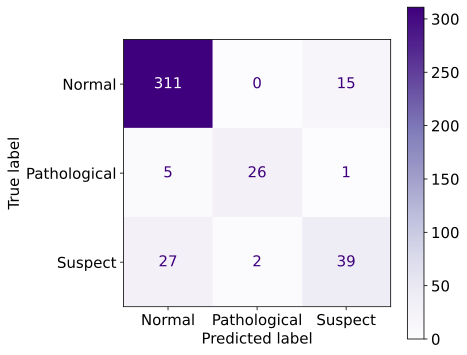

In [308]:
cm = confusion_matrix(test_y, y_pred, labels = grid_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = grid_cv.classes_)

# Specify figure size and font size
fig, ax = plt.subplots(figsize = (6, 6))
plt.rcParams.update({'font.size': 15})

# Display Confusion Matrix
disp.plot(cmap = 'Purples', ax = ax);
plt.savefig("adaconfustion_mat.svg");

In [309]:
# Getting prediction probabilites
prob = grid_cv.predict_proba(test_X)


result = pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})


result[['Prob. of Normal','Prob. of Suspect','Prob of Pathological']] = pd.DataFrame(prob.tolist(), index = result.index)

# Saving dataframe as a csv file
result.to_csv('Prediction Results.csv', index = False)

result.sample(10)

,Actual,Predicted,Prob. of Normal,Prob. of Suspect,Prob of Pathological
1897,Normal,Normal,0.362053,0.301659,0.336288
546,Suspect,Suspect,0.337762,0.316801,0.345437
1608,Normal,Normal,0.354282,0.313106,0.332612
1447,Normal,Normal,0.351638,0.299173,0.349189
1921,Normal,Normal,0.355120,0.314590,0.330290
861,Normal,Normal,0.362586,0.292358,0.345056
2055,Normal,Normal,0.350139,0.312699,0.337162
807,Suspect,Suspect,0.349214,0.299879,0.350906
1028,Normal,Normal,0.361997,0.302321,0.335682
1681,Pathological,Pathological,0.331976,0.347518,0.320506


In [310]:
importance = grid_cv.best_estimator_.feature_importances_

In [311]:
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

feature_imp

,Feature,Importance
0,abnormal_short_term_variability,0.165162
1,percentage_of_time_with_abnormal_long_term_var...,0.133742
2,histogram_mean,0.108726
3,baseline value,0.072611
4,histogram_mode,0.064953
5,histogram_median,0.060940
6,prolongued_decelerations,0.048776
7,histogram_variance,0.040093
8,mean_value_of_short_term_variability,0.038195
9,fetal_movement,0.033567


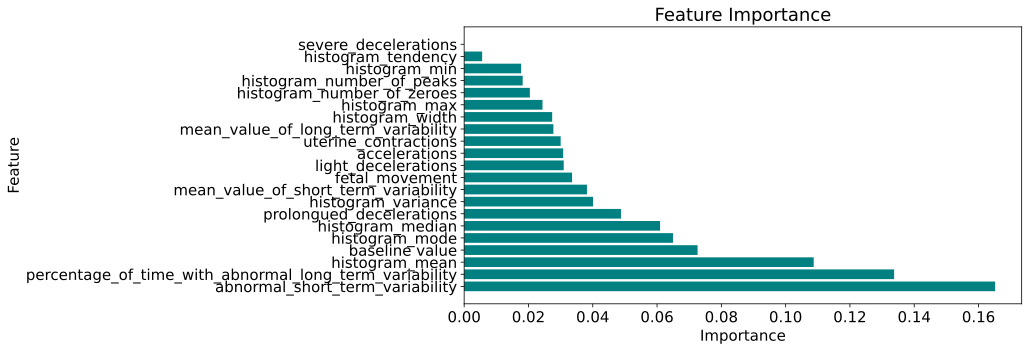

In [312]:
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color ='teal')

plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");
plt.savefig("ada_feature_imp.svg");

In [313]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
ada_pickle = open('ada_boost.pickle', 'wb') 

# Write DT model to the file
pickle.dump(classifier, ada_pickle) 

# Close the file
ada_pickle.close() 

In [314]:
dt_clf = DecisionTreeClassifier(random_state = 42)
rnd_clf = RandomForestClassifier(random_state = 42)
ada_clf= AdaBoostClassifier(algorithm = 'SAMME', random_state = 42)

In [315]:
################################################################
 ### Used ChatGPT see appendix for details
f1scores=[]
estimators = [('dt', dt_clf), ('rf', rnd_clf), ('ada', ada_clf)]
for name, clf in estimators:
    clf.fit(train_X, train_y)
    y_pred = clf.predict(test_X)

    f1score= f1_score(test_y, y_pred, average = 'macro')
    f1scores.append(f1score)
total = sum(f1scores)
weights = [score / total for score in f1scores]
######################################################
print(weights)

[0.33958294412409906, 0.3449495267281467, 0.31546752914775417]


In [316]:

voting_clf1 = VotingClassifier(estimators=estimators, voting='soft', weights=weights)
voting_clf1.fit(train_X, train_y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('ada',
                              AdaBoostClassifier(algorithm='SAMME',
                                                 random_state=42))],
                 voting='soft',
                 weights=[0.33958294412409906, 0.3449495267281467,
                          0.31546752914775417])

In [322]:
grid_cv = GridSearchCV(estimator = voting_clf1, 
                        param_grid = param_grid, 
                        scoring= 'f1_macro', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs = -1) 

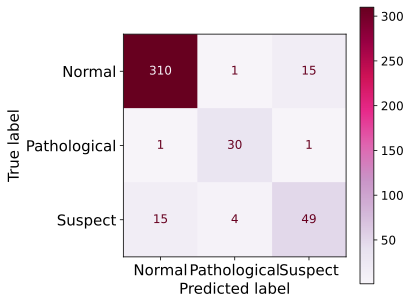

In [317]:
# Predictions on test set
y_pred = voting_clf1.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = voting_clf1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = voting_clf1.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (5, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
dispplot=disp.plot(cmap = 'PuRd', ax = ax);
fig.savefig("sfconfusion_mat.svg", bbox_inches ='tight')

In [318]:
print("Classification Report - \n", 
      classification_report(test_y, y_pred))
reportsf = classification_report(test_y, y_pred, output_dict = True)
report_sf = pd.DataFrame(reportsf)
report_sf
report_sf.to_csv('sf_class_report.csv') 

Classification Report - 
               precision    recall  f1-score   support

      Normal       0.95      0.95      0.95       326
Pathological       0.86      0.94      0.90        32
     Suspect       0.75      0.72      0.74        68

    accuracy                           0.91       426
   macro avg       0.85      0.87      0.86       426
weighted avg       0.91      0.91      0.91       426



In [321]:
#importance = voting_clf1.feature_importances_

# # Storing feature importance as a dataframe
# feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
#                columns = ['Feature', 'Importance'])

# feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# # Bar plot
# plt.figure(figsize=(10, 5))
# plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

# plt.xlabel("Importance")
# plt.ylabel("Input Feature")
# plt.title('Which features are the most important for species prediction?') 
# plt.tight_layout()
# plt.savefig("sf_feature_imp.svg");

AttributeError: 'VotingClassifier' object has no attribute 'feature_importances_'

In [327]:
# Medium article was used for help with this code
def compute_feature_importance(voting_clf, weights):
  
    
    feature_importance = dict()
    for est in voting_clf.estimators_:
        feature_importance[str(est)] = est.feature_importances_
    
    fe_scores = [0]*len(list(feature_importance.values())[0])
    for idx, imp_score in enumerate(feature_importance.values()):
        imp_score_with_weight = imp_score*weights[idx]
        fe_scores = list(np.add(fe_scores, list(imp_score_with_weight)))
    return fe_scores

fe_scores = compute_feature_importance(voting_clf1, weights)

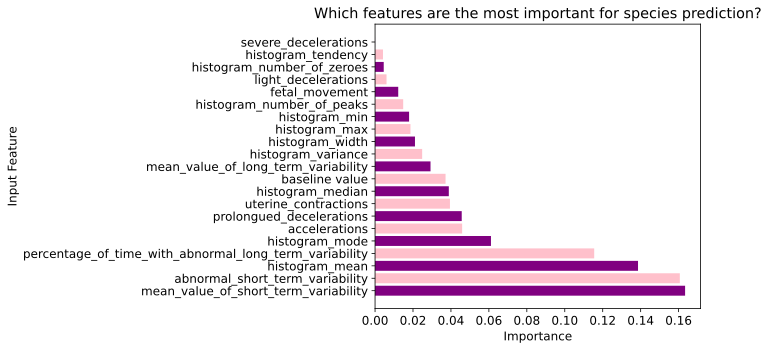

In [329]:
feature_imp = pd.DataFrame(list(zip(train_X.columns, fe_scores)),
                columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# # Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("sf_feature_imp.svg");

In [320]:
sf_pickle = open('softvoting_health.pickle', 'wb') 

# Write DT model to the file
pickle.dump(voting_clf1, sf_pickle) 

# Close the file
sf_pickle.close() 

